In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

cars = pd.read_csv(r'C:\\Users\\AKUNNA DOVE\\Downloads\\Datasets-master\\USA_cars_datasets.csv') 
    
print(cars.shape)

(2499, 13)


In [2]:
print(cars.columns)

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')


In [3]:
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
cars.brand = [ 1 if each == "toyota"
                else 2 if each == "ford"
                else 3 if each == "dodge"
                else 4 if each == "chevrolet"
                else 5 if each == "gmc"
                else 6 if each == "chrysler"
                else 7 if each == "kia"
                else 8 if each == "buick"
                else 9 if each == "infinity"
                else 10 if each == "mercedes"
                else 11 if each == "jeep"
                else 12 if each == "cadillac"
                else 13 if each == "bmw"
                else 14 if each == "hyundai"
                else 15 if each == "honda"
                else 16 if each == "mazda"
                else 17 if each == "heartland"
                else 18 if each == "jaguar"
                else 19 if each == "acura"
                else 20 if each == "harley-davidson"
                else 21 if each == "audi"
                else 22 if each == "lincoln"
                else 23 if each == "lexus"
                else 24 if each == "nissan"
                else 25 if each == "land"
                else 26 if each == "maserati"
                else 27 if each == "peterbilt"
                else 28 if each == "ram"
                else 29 for each in cars.brand]
   

In [5]:
cars.color = [ 1 if each == "black"
                else 2 if each == "gray"
                else 3 if each == "blue"
                else 4 if each == "white"
                else 5 if each == "gold"
                else 6 if each == "red"
                else 7 if each == "silver"
                else 8 if each == "orange"
                else 9 if each == "brown"
                else 10 if each == "no_color"
                else 11 if each == "charcoal"
                else 12 if each == "turquoise"
                else 13 if each == "beige"
                else 14 if each == "green"
                else 15 if each == "dark blue"
                else 16 if each == "maroon"
                else 17 if each == "phantom"
                else 18 if each == "yellow"
                else 19 if each == "light blue"
                else 20 if each == "toreador red"
                else 21 if each == "bright white clearcoat"
                else 22 if each == "billet silver metallic clearcoat"
                else 23 if each == "black clearcoat"
                else 24 if each == "jazz blue pearlcoat"
                else 25 if each == "ruby red metallic tinted clearcoat"
                else 26 if each == "triple yellow tri-coat"
                else 27 if each == "competition orange"
                else 28 if each == "off-white"
                else 29 if each == "shadow black"
                else 30 if each == "magnetic metallic"
                else 31 if each == "ingot silver metallic"
                else 32 if each == "royal crimson metallic tinted clearcoat"
                else 33 if each == "kona blue metallic"
                else 34 if each == "oxford white"
                else 35 if each == "lightening blue"
                else 36 if each == "white platinum tri-coat metallic"
                else 37 for each in cars.color]
   

In [6]:
cars.describe().round(2)

,Unnamed: 0,price,brand,year,mileage,color,lot
count,2499.00,2499.00,2499.00,2499.00,2499.00,2499.00,2.499000e+03
mean,1249.00,18767.67,6.12,2016.71,52298.69,4.66,1.676914e+08
std,721.54,12116.09,7.73,3.44,59705.52,5.18,2.038772e+05
min,0.00,0.00,1.00,1973.00,0.00,1.00,1.593488e+08
25%,624.50,10200.00,2.00,2016.00,21466.50,2.00,1.676253e+08
50%,1249.00,16900.00,3.00,2018.00,35365.00,4.00,1.677451e+08
75%,1873.50,25555.50,4.00,2019.00,63472.50,6.00,1.677798e+08
max,2498.00,84900.00,29.00,2020.00,1017936.00,37.00,1.678055e+08


In [7]:
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,1,cruiser,2008,clean vehicle,274117,1,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,2,se,2011,clean vehicle,190552,7,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,3,mpv,2018,clean vehicle,39590,7,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,2,door,2014,clean vehicle,64146,3,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,4,1500,2018,clean vehicle,6654,6,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [8]:
corr_matrix = cars.corr().round(2)
print(corr_matrix)

            Unnamed: 0  price  brand  year  mileage  color   lot
Unnamed: 0        1.00   0.10   0.30  0.24    -0.13   0.06  0.01
price             0.10   1.00  -0.23  0.42    -0.40  -0.02  0.16
brand             0.30  -0.23   1.00  0.05    -0.00  -0.02 -0.14
year              0.24   0.42   0.05  1.00    -0.59  -0.11  0.16
mileage          -0.13  -0.40  -0.00 -0.59     1.00   0.06 -0.13
color             0.06  -0.02  -0.02 -0.11     0.06   1.00 -0.05
lot               0.01   0.16  -0.14  0.16    -0.13  -0.05  1.00


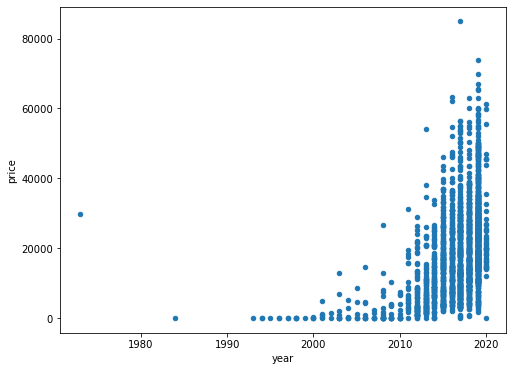

In [9]:
cars.plot(kind='scatter', x='year', y='price', figsize=(8,6))
plt.show()

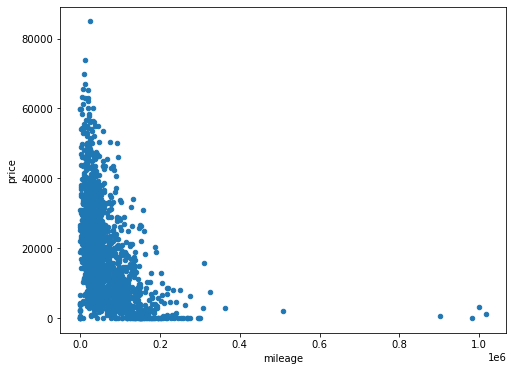

In [10]:
cars.plot(kind='scatter', x='mileage', y='price', figsize=(8,6))
plt.show()

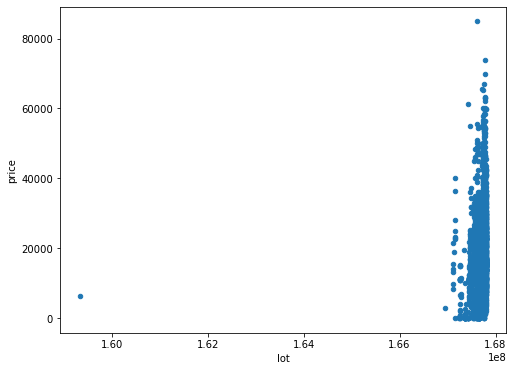

In [11]:
cars.plot(kind='scatter', x='lot', y='price', figsize=(8,6))
plt.show()

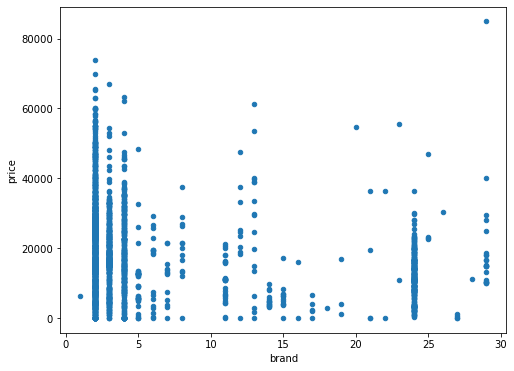

In [12]:
cars.plot(kind='scatter', x='brand', y='price', figsize=(8,6))
plt.show()

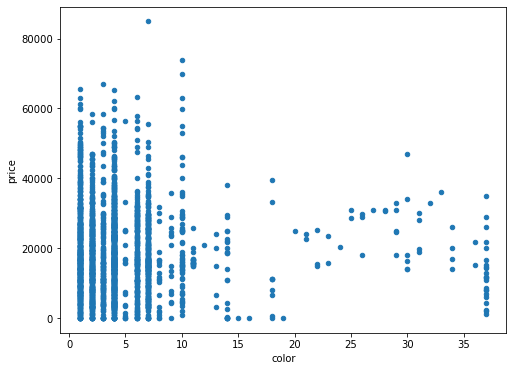

In [13]:
cars.plot(kind='scatter', x='color', y='price', figsize=(8,6))
plt.show()

In [14]:
#..........................FIRST MODEL....................................................

X = cars[['year']]
Y = cars['price'] #target

#CHECKING TO MAKE SURE THAT ROW COUNTS ARE ACCURATE AND SAME
print("ROW AND COLUMN COUNT")
print (X.shape)
print (Y.shape) 
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

model = LinearRegression()
    
model.fit(X_train, Y_train)

y_test_predicted = model.predict(X_test)

print('INTERCEPT:',model.intercept_.round(2))
print('SLOPE:',model.coef_.round(2))

#First Model Price Prediction
print('CAR PRICE PREDICTION:', model.intercept_ + model.coef_*2011)

ROW AND COLUMN COUNT
(2499, 1)
(2499,)
INTERCEPT: -2749041.88
SLOPE: [1372.41]
CAR PRICE PREDICTION: [10866.62830048]


In [15]:
#........................SECOND MODEL........................................................ 

X2 = cars[['year', 'mileage']]
Y = cars['price'] #target

X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.3, random_state = 1)
    
model2 = LinearRegression()
    
model2.fit(X2_train, Y_train)

y_test_predicted2 = model2.predict(X2_test)

print('INTERCEPT:', model2.intercept_.round(2))
print('SLOPE:', model2.coef_.round(2))

#Second Model Price Prediction
print('CAR PRICE PREDICTION:',model2.intercept_.round(2)+(model2.coef_.round(2)[0]*2011)+(model2.coef_.round(2)[1]*190552))

INTERCEPT: -1885552.2
SLOPE: [ 9.4536e+02 -4.0000e-02]
CAR PRICE PREDICTION: 7944.680000000009


In [16]:
#............................THIRD MODEL..................................................... 

X3 = cars[['year', 'mileage', 'lot']]
Y = cars['price'] #target

X3_train, X3_test, Y_train, Y_test = train_test_split(X3, Y, test_size = 0.3, random_state = 1)
    
model3 = LinearRegression()
    
model3.fit(X3_train, Y_train)

y_test_predicted3 = model3.predict(X3_test)

print('INTERCEPT:',model3.intercept_.round(2))
print('SLOPE:',model3.coef_.round(2))

#Third Model Price Prediction
print('CAR PRICE PREDICTION:',model3.intercept_.round(2)+(model3.coef_.round(2)[0]*2011)+(model3.coef_.round(2)[1]*190552)+(model3.coef_.round(2)[2]*166951262))

INTERCEPT: -2494418.53
SLOPE: [ 9.142e+02 -4.000e-02  0.000e+00]
CAR PRICE PREDICTION: -663584.4099999996


In [17]:
#...........................FOURTH MODEL..................................................... 

X4 = cars[['year', 'mileage', 'lot', 'brand']]
Y = cars['price'] #target

X4_train, X4_test, Y_train, Y_test = train_test_split(X4, Y, test_size = 0.3, random_state = 1)
    
model4 = LinearRegression()
    
model4.fit(X4_train, Y_train)

y_test_predicted4 = model4.predict(X4_test)

print('INTERCEPT:',model4.intercept_.round(2))
print('SLOPE:',model4.coef_.round(2))

#Fourth Model Price Prediction
print('CAR PRICE PREDICTION:',model4.intercept_.round(2)+(model4.coef_.round(2)[0]*2011)+(model4.coef_.round(2)[1]*190552)+(model4.coef_.round(2)[2]*166951262)+(model4.coef_.round(2)[3]*2))

INTERCEPT: -2388122.2
SLOPE: [ 9.9489e+02 -4.0000e-02  0.0000e+00 -3.4336e+02]
CAR PRICE PREDICTION: -395707.21000000014


In [18]:
#...........................FIFTH MODEL..................................................... 

X5 = cars[['year', 'mileage', 'lot', 'brand', 'color']]
Y = cars['price'] #target

X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size = 0.3, random_state = 1)
    
model5 = LinearRegression()
    
model5.fit(X5_train, Y_train)

y_test_predicted5 = model5.predict(X5_test)

print('INTERCEPT:',model5.intercept_.round(2))
print('SLOPE:',model5.coef_.round(2))

#Fifth Model Price Prediction
print('CAR PRICE PREDICTION:',model5.intercept_.round(2)+(model5.coef_.round(2)[0]*2011)+(model5.coef_.round(2)[1]*190552)+(model5.coef_.round(2)[2]*166951262)+(model5.coef_.round(2)[3]*2)+(model5.coef_.round(2)[4]*2))

INTERCEPT: -2405613.78
SLOPE: [ 1.00151e+03 -4.00000e-02  0.00000e+00 -3.42810e+02  4.47500e+01]
CAR PRICE PREDICTION: -399795.36999999994


In [19]:
#..............MEAN SQUARED ERROR REPORT FOR THE DIFFERENT MODELS................

#FIRST
print(mean_squared_error(Y_test, y_test_predicted).round(2))

#SECOND
print(mean_squared_error(Y_test, y_test_predicted2).round(2))

#THIRD
print(mean_squared_error(Y_test, y_test_predicted3).round(2))

#FOURTH
print(mean_squared_error(Y_test, y_test_predicted4).round(2))

#FIFTH
print(mean_squared_error(Y_test, y_test_predicted5).round(2))

119889631.52
115077113.69
113729203.71
102735071.49
102661236.16


In [20]:
#.....THE FIFTH MODEL IS THE MOST ACCURATE IN TERMS OF PREDICTION.......